In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from sklearn.datasets import make_spd_matrix

# Conjugate gradient method

In [10]:
def conjugate_gradient(A, b, x_0=None, tol=1e-6, max_iter=None, verbose=False):
    n = len(b)
    max_iter = max_iter if max_iter is not None else n

    d = np.zeros((max_iter+1, n))
    r = np.zeros((max_iter+1, n))
    alpha = np.zeros(max_iter+1)
    beta = np.zeros(max_iter+1)
    x = np.zeros((max_iter+1, n))

    x[0] = x_0 if x_0 is not None else np.zeros(n)

    d[0] = r[0] = b - A @ x[0]
    for k in range(max_iter+1):
        if verbose:
            print(f"Iteration {k}:    x = {x[k]}    r = {np.linalg.norm(r[k])}")
        if np.linalg.norm(r) <= tol * np.linalg.norm(b):
            print("STOP: Tolerance criterion fullfilled.")
            break
        if k == max_iter:
            print("STOP: Max. Iteration reached.")
            break
        alpha[k] = np.dot(r[k], r[k]) / (d[k].T @ A @ d[k])
        x[k+1] = x[k] + alpha[k] * d[k]
        r[k+1] = b - A @ x[k+1]
        beta[k] = np.dot(r[k+1], r[k+1]) / np.dot(r[k], r[k])
        d[k+1] = r[k+1] + beta[k] * d[k]
    sol = x[k]
    return sol, x, r, d, alpha, beta

## Example 1 (n=2)

In [14]:
A = np.array([[4, 1],
              [1, 3]])
b = np.array([1,2])
x_0 = np.array([2,6])

x, x_list, r_list, d_list, alpha, beta = conjugate_gradient(A,b, x_0=x_0, verbose=True)

Iteration 0:    x = [2. 6.]    r = 22.20360331117452
Iteration 1:    x = [-1.02882798  1.80623819]    r = 4.081853349738604
Iteration 2:    x = [0.09090909 0.63636364]    r = 6.280369834735101e-16
STOP: Max. Iteration reached.


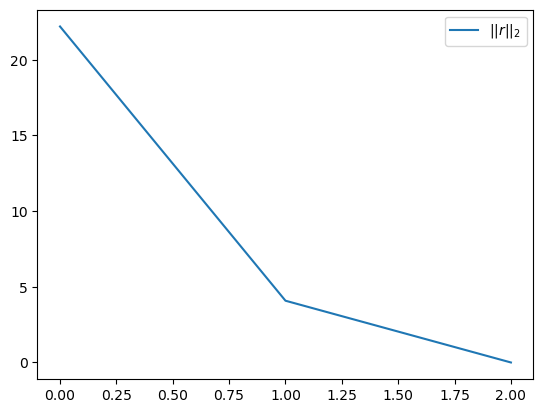

In [4]:
plt.plot([np.linalg.norm(r) for r in r_list], label="$||r||_2$")
plt.legend()
plt.show()

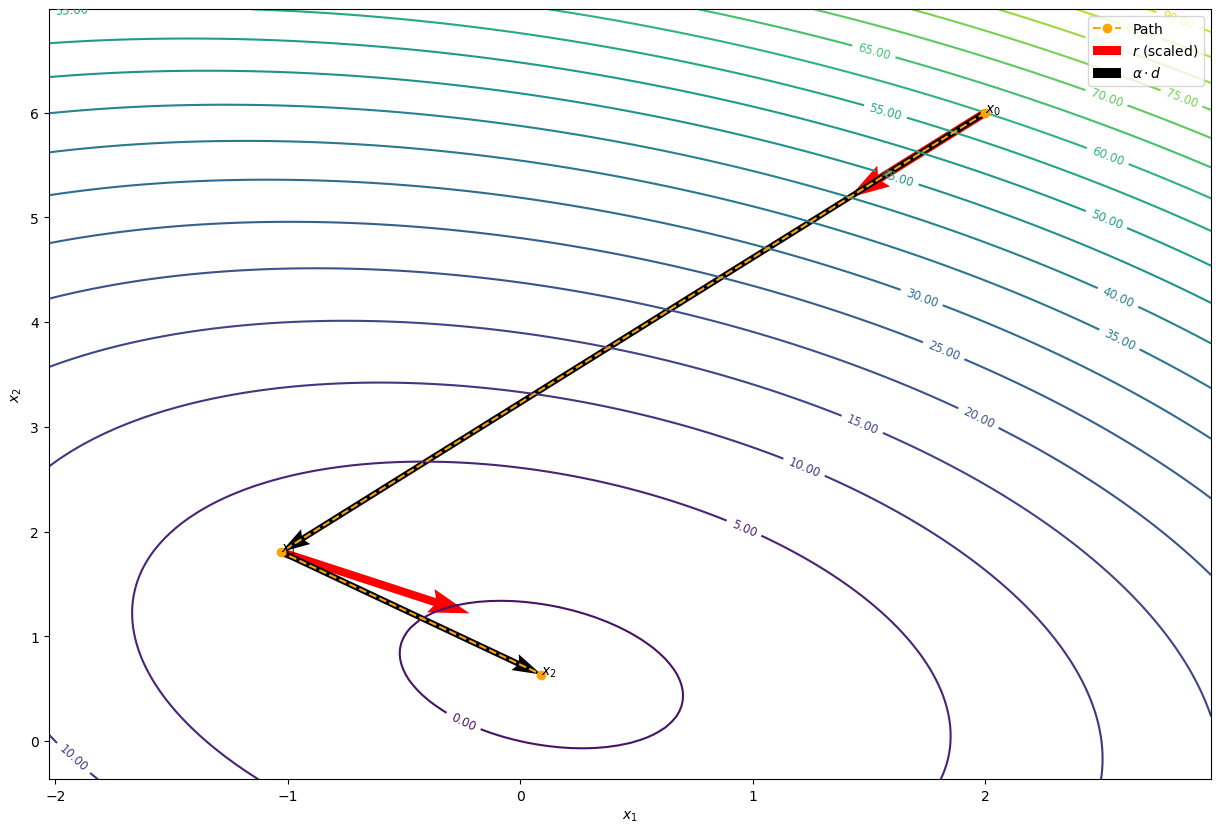

In [38]:
f = lambda x: 1/2 * x.T @ A @ x - b.T @ x

def create_mesh(f):
    X1, X2 = np.mgrid[min(x_list[:,0])-1:max(x_list[:,0])+1:0.05, min(x_list[:,1])-1:max(x_list[:,1])+1:0.05]
    F = np.zeros(X1.flatten().shape)
    for idx, (x1,x2) in enumerate(zip(X1.flatten(),X2.flatten())):
        F[idx] = f(np.array([x1,x2]))
    return X1, X2, F.reshape(X1.shape)

plt.figure(figsize=(15,10))
X1, X2, F = create_mesh(f)
cs = plt.contour(X1, X2, F, 20)
plt.clabel(cs, fontsize='smaller', fmt='%1.2f')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.plot(x_list[:,0], x_list[:,1], linestyle='--', marker='o', color='orange', label="Path")
for i,x in enumerate(x_list):
    plt.annotate(f"$x_{i}$",x)

r_list_norm = np.array([r/np.linalg.norm(r) for r in r_list])  # scale to length 1
plt.quiver(x_list[:-1,0], x_list[:-1,1], r_list_norm[:-1,0], r_list_norm[:-1,1], scale_units='xy', scale=1, label="$r$ (scaled)", width=0.007, color="red", angles="xy")

plt.quiver(x_list[:-1,0], x_list[:-1,1], alpha[:-1]*d_list[:-1,0], alpha[:-1]*d_list[:-1,1], scale_units='xy', scale=1, label=r"$\alpha \cdot d$", angles="xy", width=0.005)

plt.legend()
plt.show()

## Example 2 (n=50)

In [7]:
n = 50
A = make_spd_matrix(n, random_state=0)
b = A @ np.random.random(n)

x, x_list, r_list, d, alpha, beta = conjugate_gradient(A,b)

STOP: Max. Iteration reached.


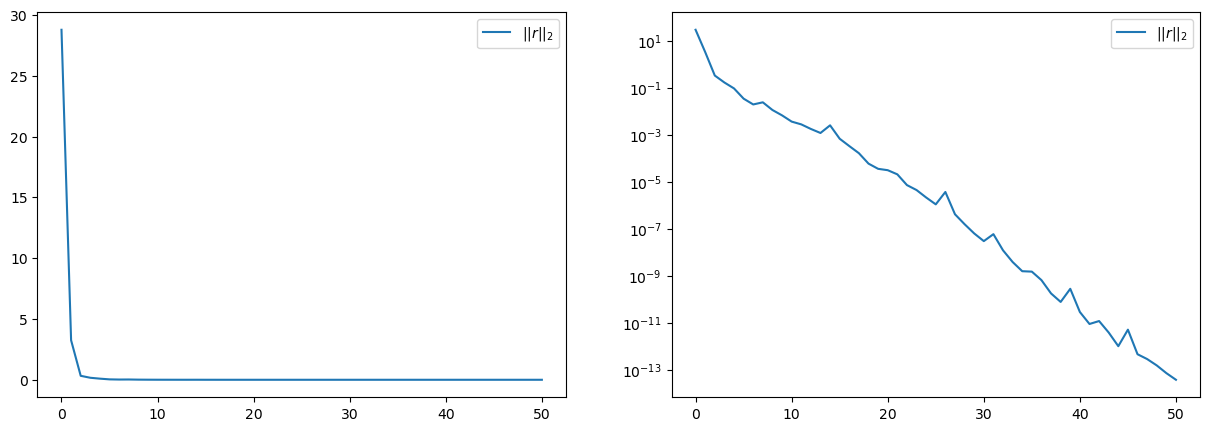

In [8]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot([np.linalg.norm(r) for r in r_list], label="$||r||_2$")
ax[1].plot([np.linalg.norm(r) for r in r_list], label="$||r||_2$")
ax[0].legend()
ax[1].legend()
ax[1].set_yscale("log")
plt.show()